In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
targets = pandas.read_csv("APs_Beyond.txt", index_col = 0, header=None, sep=" ")

letters_1 = np.array(["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"])
letters_3 = np.array(['ALA', 'CYS', 'ASP', 'GLU', 'PHE', 'GLY', 'HSE', 'ILE', 'LYS', 'LEU', 'MET', 'ASN', 'PRO', 'GLN', 'ARG', 'SER', 'THR', 'VAL', 'TRP', 'TYR'], dtype='<U3')

def translate3to1(string):
    code = string.split("-")
    new_string = ""
    for AA in code:
        if AA == "HIS":
            AA = "HSE"
        index = np.where(letters_3 == AA)[0]
        new_string = new_string + str(letters_1[index][0])
    return "".join(new_string)

targets.index = [translate3to1(index) for index in targets.index]
targets = targets.reindex([x for x in targets.index if len(x) == 4])


In [3]:
print(targets)

             1
AAAA  1.062640
AAAC  1.103924
AACN  1.168115
AAQW  1.740687
AAEQ  1.064391
...        ...
VVVC  2.016710
VVVF  2.272662
VVVW  2.345190
VVVY  2.291805
VVVV  2.079618

[17665 rows x 1 columns]


In [4]:
letter_format = np.vstack([list(x) for x in targets.index])
print(letter_format)

[['A' 'A' 'A' 'A']
 ['A' 'A' 'A' 'C']
 ['A' 'A' 'C' 'N']
 ...
 ['V' 'V' 'V' 'W']
 ['V' 'V' 'V' 'Y']
 ['V' 'V' 'V' 'V']]


In [5]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(letter_format)

encoded = enc.transform(letter_format).toarray()
print(encoded.shape)

(17665, 80)


In [20]:
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
#model = MLPRegressor(hidden_layer_sizes=((80,40,80)), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=500, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
#model = RandomForestRegressor()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(encoded, targets[1], test_size=0.33, random_state=9876, shuffle=True)

r2 score: 0.9669243290928894


Text(0, 0.5, 'Measured AP')

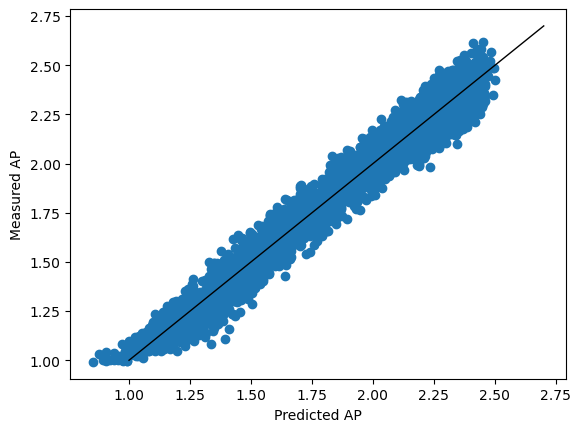

In [22]:
model.fit(X_train, y_train)

pred = model.predict(X_test)

r2 = r2_score(y_test, pred)
print("r2 score:", r2)
plt.scatter(pred, y_test)
plt.plot([1,2.7], [1,2.7], lw=1, color="black")
plt.xlabel("Predicted AP")
plt.ylabel("Measured AP")

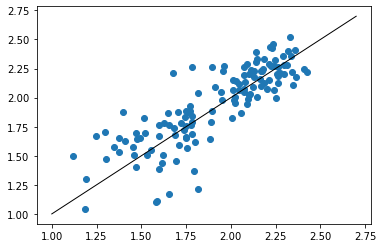

In [46]:
reduced_sample = np.random.choice(np.arange(encoded.shape[0]), 400, replace=False)
X_train, X_test, y_train, y_test = train_test_split(encoded[reduced_sample], targets[1].iloc[reduced_sample], test_size=0.33, random_state=9876, shuffle=True)

model.fit(X_train, y_train)

pred = model.predict(X_test)


plt.scatter(pred, y_test)
plt.plot([1,2.7], [1,2.7], lw=1, color="black")
